Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Cleaning Complete!
The cleaned data is ready and saved in Google Drive.
--------------------------------------------------
All rows of the cleaned data with BMI and BMI Category:
+-----------+-----+---------------+--------------------+--------------------+--------------------+---------------+
| PatientID | Age | BloodPressure |     SugarLevel     |       Weight       |        BMI         |  BMICategory  |
+-----------+-----+---------------+--------------------+--------------------+--------------------+---------------+
|     1     |  44 |      118      | 87.89249491582838  | 105.56803408361246 | 36.528731516820926 |     Obese     |
|     2     |  39 |      109      | 177.32180303065556 | 105.70342555971732 | 36.575579778448905 |     Obese     |
|     3     |  49 |      149      | 144.14827323225148 | 77.78706964302448  | 26.915941052949652 |   Overweight 

<ipython-input-11-ed05651f7be3>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMICategory', data=df_cleaned, palette='Set2')


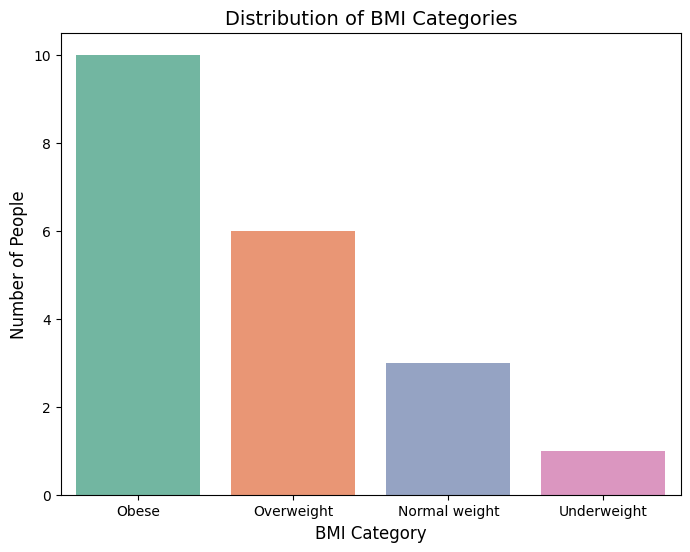

Cleaned data with BMI and BMI Category has been saved to Google Drive as:
/content/drive/MyDrive/cleaned_healthcare_data_with_bmi.csv


In [11]:
import pandas as pd
from google.colab import drive
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the file path and load the CSV file from Google Drive
file_path = '/content/drive/MyDrive/healthcare_data.csv'  # Path to your CSV file in Google Drive
df = pd.read_csv(file_path)

# Step 3: Clean the column names by stripping spaces or special characters
df.columns = df.columns.str.strip()

# Step 4: Assuming average height of 1.7 meters for BMI calculation
average_height = 1.7  # in meters

# Step 5: BMI Calculation
df['BMI'] = df['Weight'] / (average_height ** 2)

# Step 6: BMI Category Classification
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMICategory'] = df['BMI'].apply(categorize_bmi)

# Step 7: Display the cleaned data (all rows)
print("Data Cleaning Complete!")
print("The cleaned data is ready and saved in Google Drive.")
print("-" * 50)

# Show all rows of the cleaned dataset (with BMI and BMICategory)
print("All rows of the cleaned data with BMI and BMI Category:")

# Create a PrettyTable instance (convert columns to list)
cleaned_table = PrettyTable(df.columns.tolist())

# Add all rows to the cleaned data table
for index, row in df.iterrows():
    cleaned_table.add_row(row)

print(cleaned_table)
print("-" * 50)

# Step 8: Check for missing values in each column
print("Missing Values Summary:")
missing_values = df.isnull().sum()

# Create a PrettyTable for missing values
missing_table = PrettyTable()
missing_table.field_names = ["Column", "Missing Values"]

# Add rows to the missing values table
for column, count in missing_values.items():
    missing_table.add_row([column, count])

print(missing_table)
print("-" * 50)

# Step 9: Fill missing values with the median (if any)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SugarLevel'] = df['SugarLevel'].fillna(df['SugarLevel'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())

# Step 10: Remove duplicate rows from the dataset
df_cleaned = df.drop_duplicates()

# Step 11: Check data types and convert them if necessary
df_cleaned['PatientID'] = df_cleaned['PatientID'].astype(str)  # Ensure 'PatientID' is a string
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df_cleaned['BloodPressure'] = pd.to_numeric(df_cleaned['BloodPressure'], errors='coerce')
df_cleaned['SugarLevel'] = pd.to_numeric(df_cleaned['SugarLevel'], errors='coerce')
df_cleaned['Weight'] = pd.to_numeric(df_cleaned['Weight'], errors='coerce')

# Step 12: Remove unrealistic outliers (e.g., Age > 100)
df_cleaned = df_cleaned[df_cleaned['Age'] <= 100]

# Step 13: Show the cleaned dataset (again, after all cleaning steps)
print("All rows of the cleaned data after all cleaning steps:")

# Create a PrettyTable for cleaned data (convert columns to list)
final_table = PrettyTable(df_cleaned.columns.tolist())

# Add all rows to the final cleaned data table
for index, row in df_cleaned.iterrows():
    final_table.add_row(row)

print(final_table)
print("-" * 50)

# Step 14: Show missing values in cleaned data (should be 0 for all columns)
print("Missing Values in Cleaned Data:")

# Create a PrettyTable for missing values in cleaned data
missing_cleaned_table = PrettyTable()
missing_cleaned_table.field_names = ["Column", "Missing Values"]

missing_values_cleaned = df_cleaned.isnull().sum()

# Add rows to the cleaned missing values table
for column, count in missing_values_cleaned.items():
    missing_cleaned_table.add_row([column, count])

print(missing_cleaned_table)
print("-" * 50)

# Step 15: Create a summary table showing the number of people in each BMI category
print("Summary of BMI Categories:")

# Count the number of people in each BMI category
bmi_summary = df_cleaned['BMICategory'].value_counts().reset_index()
bmi_summary.columns = ['BMI Category', 'Number of People']

# Create a PrettyTable to display the summary
bmi_summary_table = PrettyTable(bmi_summary.columns.tolist())

# Add all rows to the summary table
for index, row in bmi_summary.iterrows():
    bmi_summary_table.add_row(row)

print(bmi_summary_table)
print("-" * 50)

# Step 16: Create a Bar Graph for BMI Categories
plt.figure(figsize=(8, 6))
sns.countplot(x='BMICategory', data=df_cleaned, palette='Set2')

# Title and labels
plt.title("Distribution of BMI Categories", fontsize=14)
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

# Show the plot
plt.show()

# Step 17: Save the cleaned data back to Google Drive
output_path = '/content/drive/MyDrive/cleaned_healthcare_data_with_bmi.csv'  # Path to save the cleaned data
df_cleaned.to_csv(output_path, index=False)

# Step 18: Inform user where the cleaned data is saved
print("Cleaned data with BMI and BMI Category has been saved to Google Drive as:")
print(output_path)
